In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import PIL

from tensorflow import keras
from tensorflow.keras import layers # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
import pathlib

In [41]:
#Pega o diretório com as imagens usando Pathlib
data_dir = pathlib.Path("C:/Users/davic/Downloads/flower_photos") #Url "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
 
#Define o tamanho dos batchs e o tamnaho padrão das imagens / Define qual parte das imagens será de Treinamento e qual será de Validação 
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
class_names = train_ds.class_names
num_classes = len(class_names)

#Insere os dados na memória cache e sobrepõe o pré-processamento dos dados e a execução do modelo durante a fase de treinamento 
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

#Faz o aumento do Dataset modificando as imagens existentes 
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

#Cria as camadas da Rede Neural Convolucional junto das camadas Fully-Conected(Dense) usando o Sequential do Keras
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #Transforma os valores dos pixels da imagem de 1/255 para 0/1
  layers.Conv2D(16, 3, padding='same', activation='relu'), #Faz a convolução das imagens com 16 filtros deixando elas com o mesmo tamanho e utilizando da função de ativação Relu
  layers.MaxPooling2D(), #Diminui o tamanho da imagem utilizando do MaxPooling de tamanho 2x2
  layers.BatchNormalization(), #Faz a normalização das imagens fazendo uma relação entre a média e a variância dos valores das imagens
  layers.Conv2D(32, 3, padding='same', activation='relu'), #Faz a convolução das imagens com 32 filtros deixando elas com o mesmo tamanho e utilizando da função de ativação Relu
  layers.MaxPooling2D(), #Diminui o tamanho da imagem utilizando do MaxPooling de tamanho 2x2
  layers.Conv2D(64, 3, padding='same', activation='relu'), #Faz a convolução das imagens com 64 filtros deixando elas com o mesmo tamanho e utilizando da função de ativação Relu
  layers.MaxPooling2D(), #Diminui o tamanho da imagem utilizando do MaxPooling de tamanho 2x2
  layers.Flatten(), #Vetoriza as matrizes dos tensores
  layers.Dropout(0.2), #Desativa aleatóriamente alguns neurônios 
  layers.Dense(128, activation='relu'), #Primeira camada Fully-Connected 
  layers.Dense(num_classes, activation='softmax')#Camada de saída da Rede, Onde cada  neurônio é uma classe 
])
#Define qual será a função de perda e qual será o modelo de optimização do Back-propagation
model.compile(optimizer='adam', #Utiliza do algoritmo otimizador Adaptative Moment estimation para as camadas convolucionais 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #Utiliza da função de perda Cross Entropy para a parte Fully-Connected da rede
              metrics=['accuracy'])
model.build((None, 180, 180, 3)) #Executa as camadas 
model.summary(expand_nested=True) #Printa como estão alocadas as camadas da rede 

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


c:\Users\davic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_flip_5 (RandomFlip) │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_rotation_5          │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_zoom_5 (RandomZoom) │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 90, 90, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,349 (15.22 MB)

 Trainable params: 3,989,317 (15.22 MB)

 Non-trainable params: 32 (128.00 B)

In [43]:
#Faz o treinamento da rede utilizando do modelo criado 
epochs=10
history = model.fit(
  train_ds, #Dataset de treinamento
  validation_data=val_ds, #Dataset de validação
  epochs=epochs #Número de épocas 
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.7678 - loss: 0.6387 - val_accuracy: 0.6853 - val_loss: 0.8728
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - accuracy: 0.7549 - loss: 0.6449 - val_accuracy: 0.6798 - val_loss: 0.7990
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 248ms/step - accuracy: 0.7676 - loss: 0.5982 - val_accuracy: 0.7125 - val_loss: 0.7707
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step - accuracy: 0.7782 - loss: 0.5787 - val_accuracy: 0.6621 - val_loss: 0.9680
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - accuracy: 0.7816 - loss: 0.5782 - val_accuracy: 0.7003 - val_loss: 0.7955
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 270ms/step - accuracy: 0.7845 - loss: 0.5572 - val_accuracy: 0.5886 - val_loss: 1.2902
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 252ms/step - accuracy: 0.7963 - loss: 0.5375 - val_accuracy: 0.7234 - val_loss: 0.7429
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 250ms/step - accuracy: 0.8012 - loss: 0.5384 - val_accu

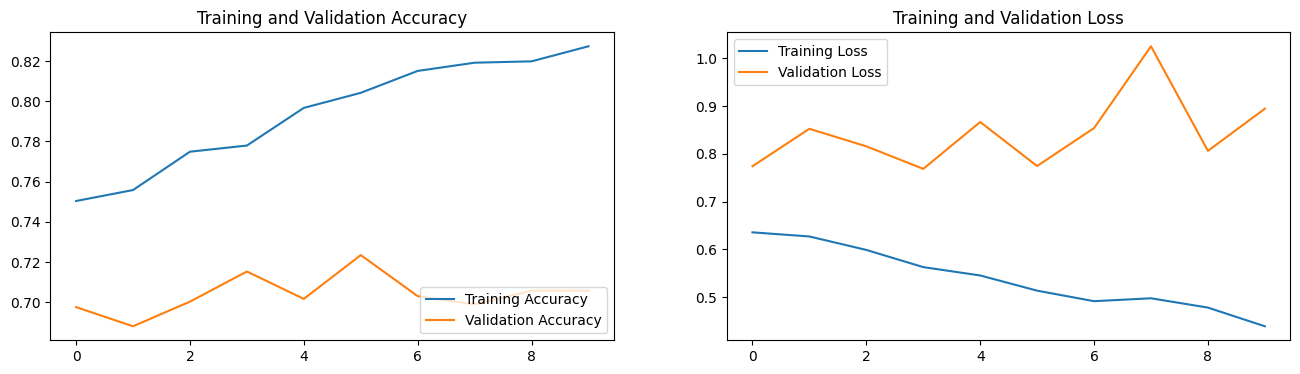

In [40]:
#Faz um gráfico utilizando da Acurácia e da Perda entre os dados de Treinamento e os Dados de Validação
plt.figure(figsize=(16, 4)) #Tamanho da imagem

plt.subplot(1, 2, 1) #Tamanho da Sub-Imagem da Esquerda
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy') #Dados de Acurácia dos dados de treino para sub-imagem da esquerda
plt.plot(range(epochs),  history.history['val_accuracy'], label='Validation Accuracy') #Dados de Acurácia dos dados de validação para sub-imagem da esquerda
plt.legend(loc='lower right') #Local da legenda da sub-imagem da esquerda
plt.title('Training and Validation Accuracy') #Título da sub-imagem da esquerda

plt.subplot(1, 2, 2) #Tamanho da Sub-Imagem da Direita
plt.plot(range(epochs), history.history['loss'], label='Training Loss') #Dados da Perda dos dados de treino para sub-imagem da direita
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss') #Dados da Perda dos dados de validação para sub-imagem direita
plt.legend(loc='upper left') #Local da legenda da sub-imagem da direita
plt.title('Training and Validation Loss') #Título da sub-imagem da direita 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Essa imagem pertence a classe dandelion com 99.52 porcento de predicão.


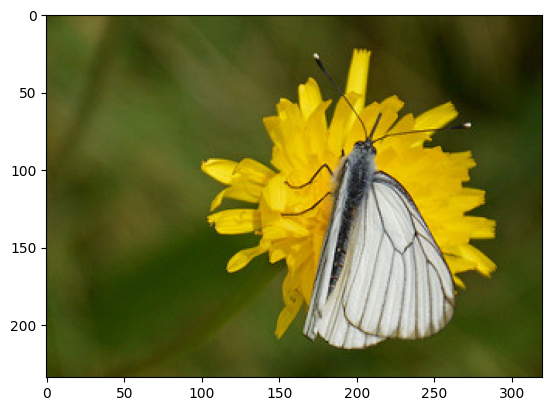

In [32]:
roses = list(data_dir.glob('roses/*')) #Carrega todas as imagens das rosas do Dataset em uma lista
dandelion = list(data_dir.glob('dandelion/*')) #Carrega todas as imagens dos dentes de leão do Dataset em uma lista
tulips = list(data_dir.glob('tulips/*')) #Carrega todas as imagens das tulipas do Dataset em uma lista
sunflowers = list(data_dir.glob('sunflowers/*')) #Carrega todas as imagens dos girassoís do Dataset em uma lista
daisy = list(data_dir.glob('daisy/*')) #Carrega todas as imagens das margaridas do Dataset em uma lista
#im = PIL.Image.open('C:/Users/davic/Downloads/Sunflower.JPG') #Carrega uma das imagens em uma variável   #dandelion[300]
im = PIL.Image.open(dandelion[130])
plt.imshow(im) #Printa a imagem
im = im.resize((180,180)) #Rescala a Imagem no formato 180x180
im_array = np.array(im) #Vetoriza a imagem no formato 180x180
im_array = np.expand_dims(im_array, axis = 0) #Rescalona a imagem no formato 180x180x1 para ficar no estilo do Keras/TEnsorFlow
score = model.predict(im_array) #Faz a predição da imagem

print("Essa imagem pertence a classe {} com {:.2f} porcento de predicão.".format(class_names[np.argmax(score)], 100 * np.max(score))) #Printa o score da imagem dizendo a qual classe ela pertence 